In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Drop missing row

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Dataset/Handling missing data/data_science_job.csv')

In [ ]:
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14.0,NaN,NaN,42.0,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14.0,NaN,NaN,52.0,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,50-99,Pvt Ltd,44.0,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,0.0,500-999,Pvt Ltd,97.0,0.0


Percentage of missing value

In [ ]:
df.isnull().mean()*100

,0
enrollee_id,0.000000
city,0.000000
city_development_index,2.500261
gender,23.530640
relevent_experience,0.000000
enrolled_university,2.014824
education_level,2.401086
major_discipline,14.683161
experience,0.339284
company_size,30.994885


In [ ]:
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [ ]:
cols = [x for x in df.columns if df[x].isnull().mean()<0.05 and df[x].isnull().mean()>0]
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [ ]:
df[cols].sample(5)

,city_development_index,enrolled_university,education_level,experience,training_hours
14519,0.624,no_enrollment,Graduate,8.0,129.0
16578,0.624,no_enrollment,Graduate,3.0,61.0
18654,0.910,NaN,NaN,15.0,9.0
13711,0.836,Full time course,High School,10.0,27.0
8617,0.920,no_enrollment,Phd,20.0,80.0


If i drop all the null values rows form this dataset (How much data i loss)

In [ ]:
(len(df[cols].dropna())/len(df))*100

89.68577095730244

In [ ]:
new_df = df[cols].dropna()
df.shape,new_df.shape

((19158, 13), (17182, 5))

In [ ]:
new_df.isnull().sum()

,0
city_development_index,0
enrolled_university,0
education_level,0
experience,0
training_hours,0


In [ ]:
df.isnull().sum()

,0
enrollee_id,0
city,0
city_development_index,479
gender,4508
relevent_experience,0
enrolled_university,386
education_level,460
major_discipline,2813
experience,65
company_size,5938


In [ ]:
new_df=df.dropna(subset=cols)

In [ ]:
new_df.shape,df.shape

((17182, 13), (19158, 13))

# For numerical data

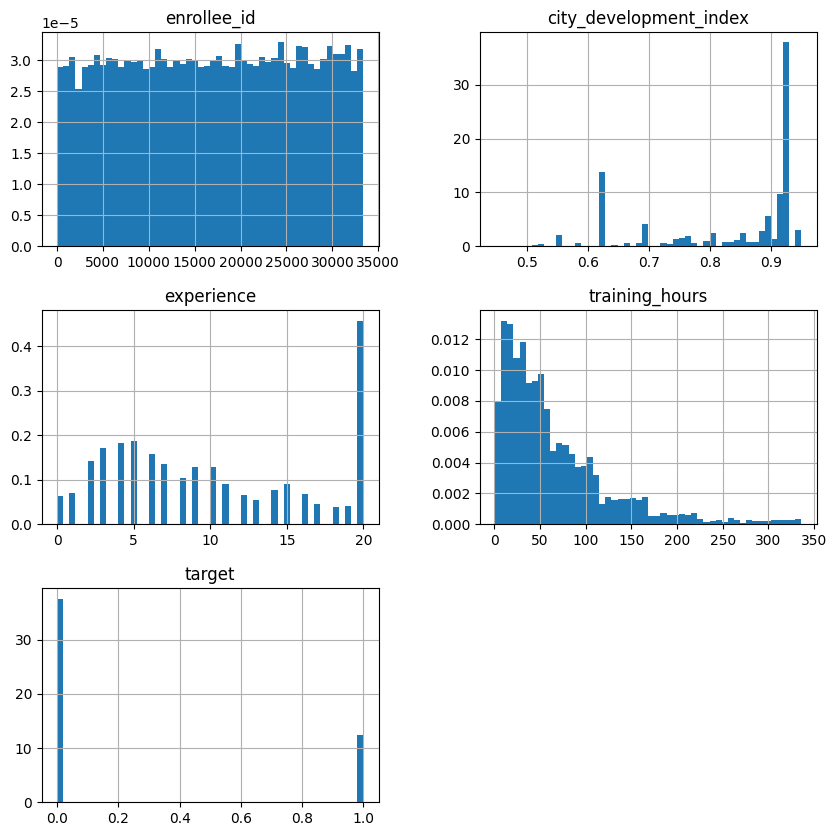

In [ ]:
new_df.hist(bins=50,density=True,figsize=(10,10))
plt.show()

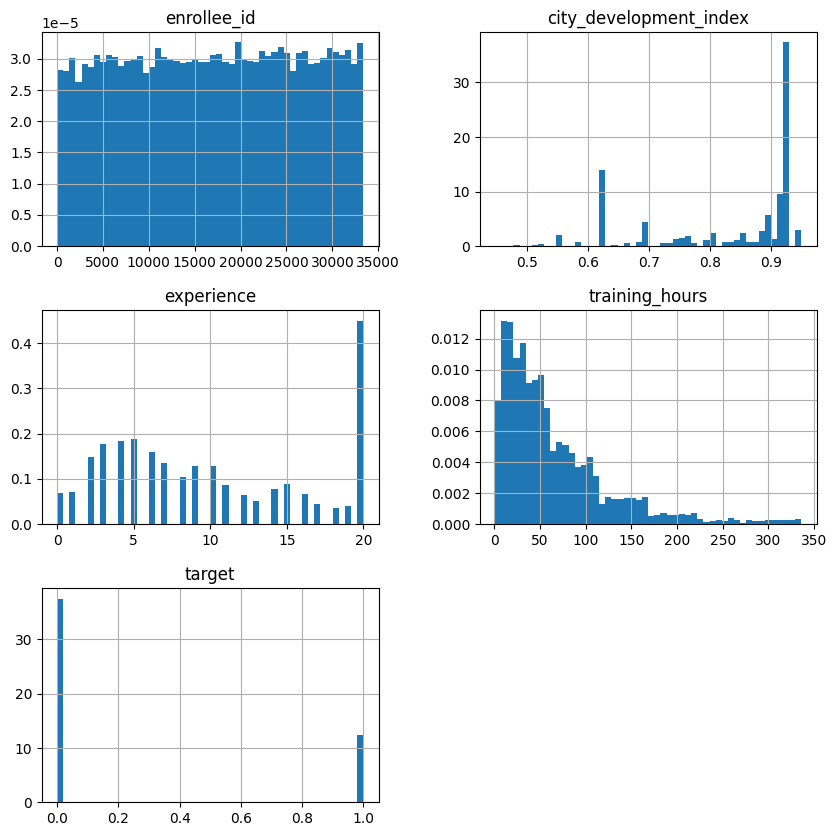

In [ ]:
df.hist(bins=50,density=True,figsize=(10,10))
plt.show()

<Axes: >

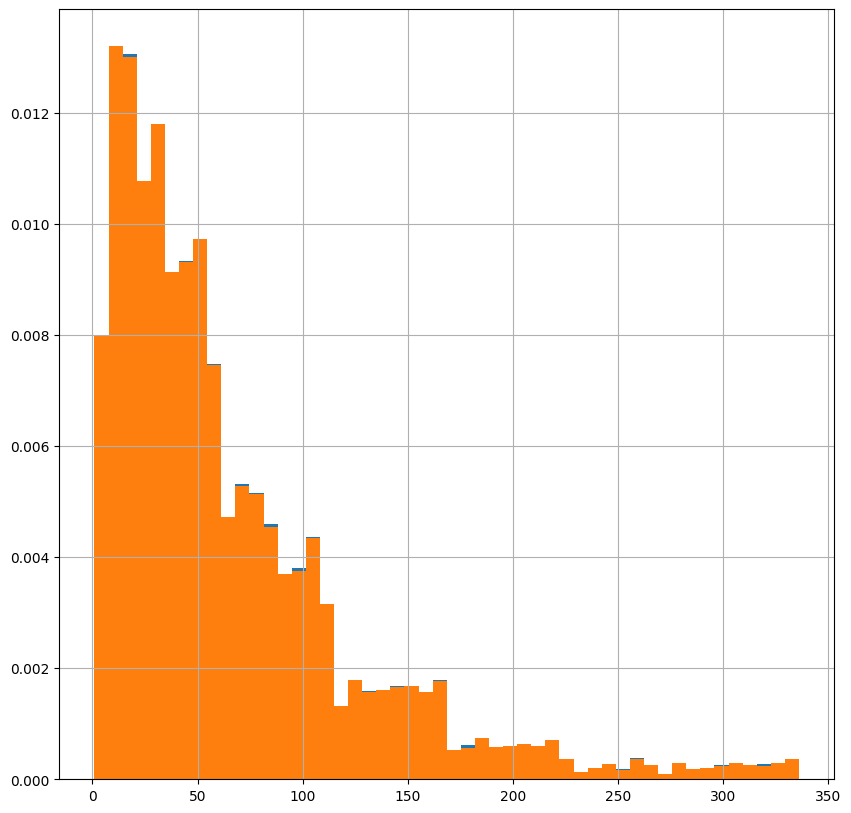

In [ ]:
fig=plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

df['training_hours'].hist(bins=50,density=True,ax=ax)
new_df['training_hours'].hist(bins=50,density=True,ax=ax)

<Axes: ylabel='Density'>

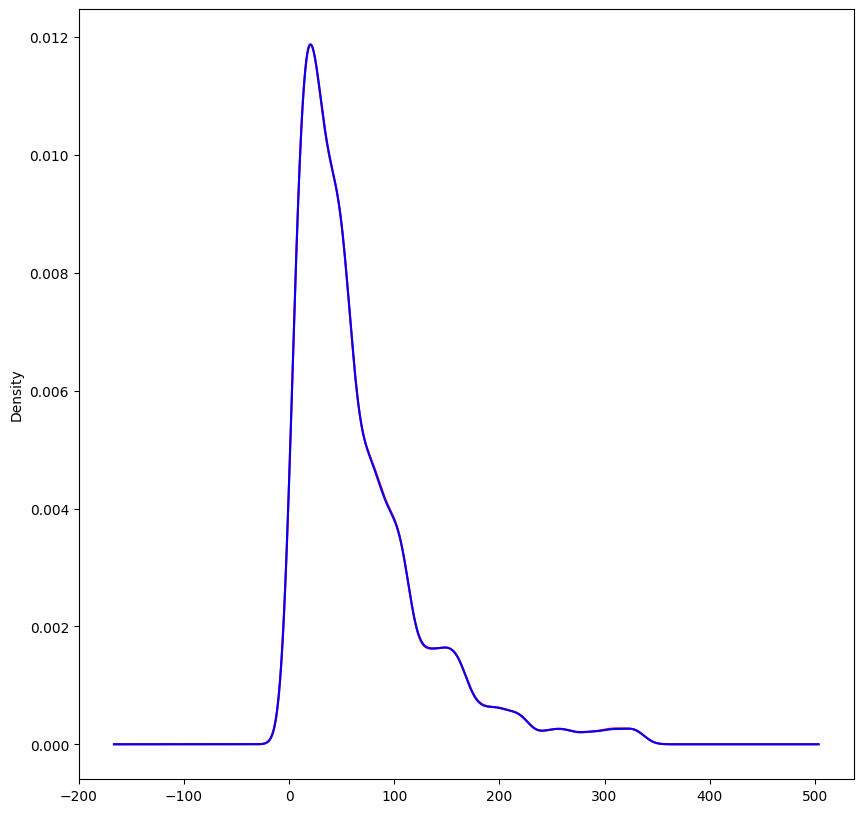

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

df['training_hours'].plot.density(color='red')
new_df['training_hours'].plot.density(color='blue')

<Axes: >

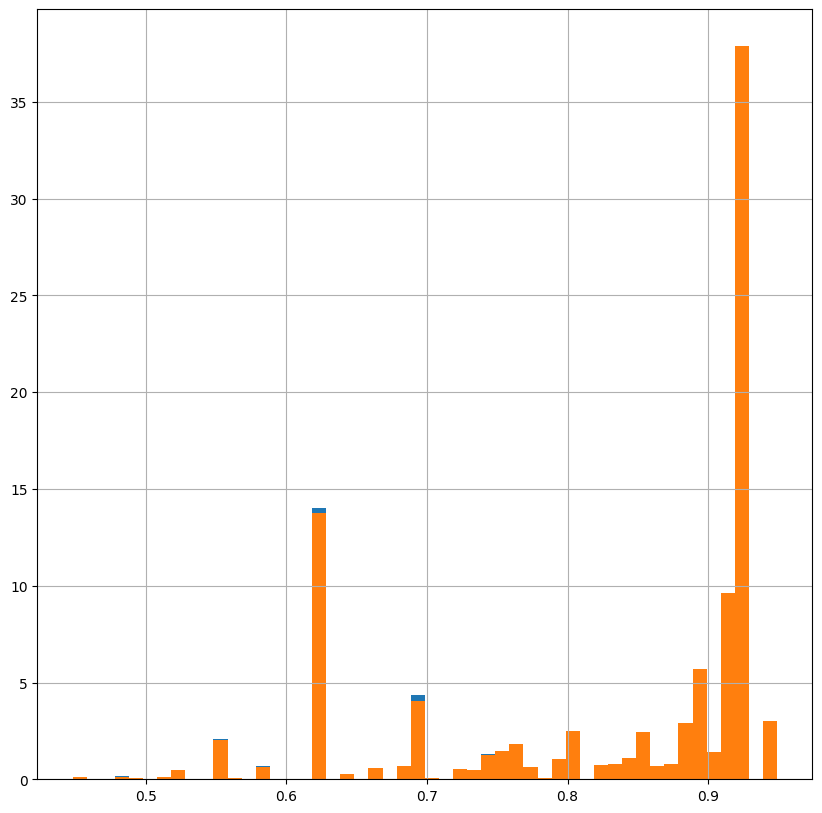

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

df['city_development_index'].hist(bins=50,density=True,ax=ax)
new_df['city_development_index'].hist(bins=50,density=True,ax=ax)


<Axes: ylabel='Density'>

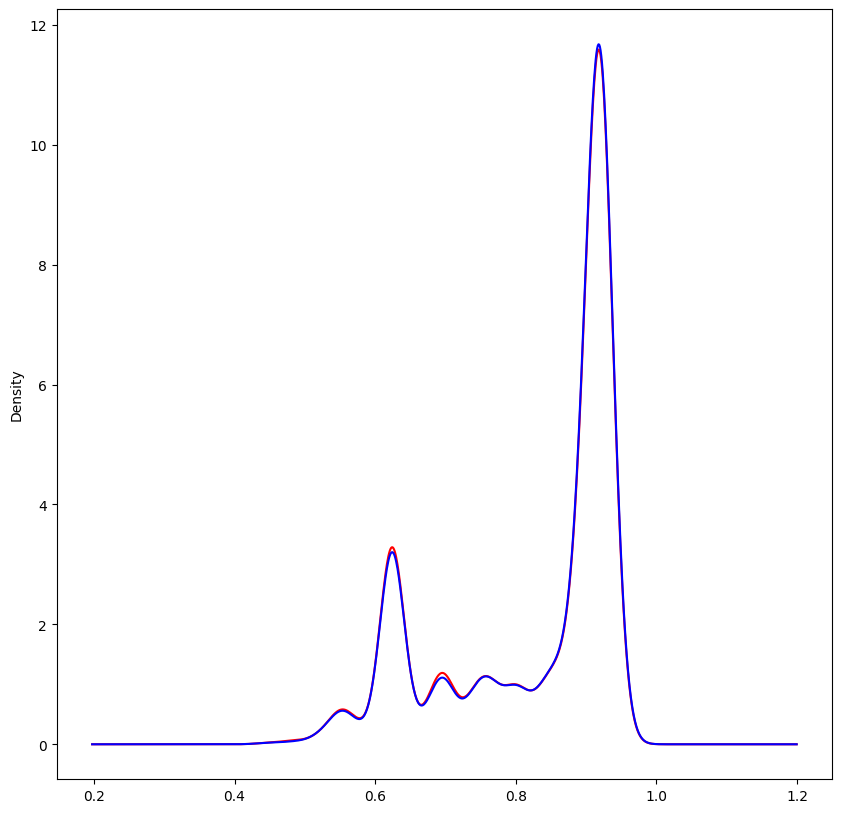

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

df['city_development_index'].plot.density(color='red')
new_df['city_development_index'].plot.density(color='blue')


<Axes: >

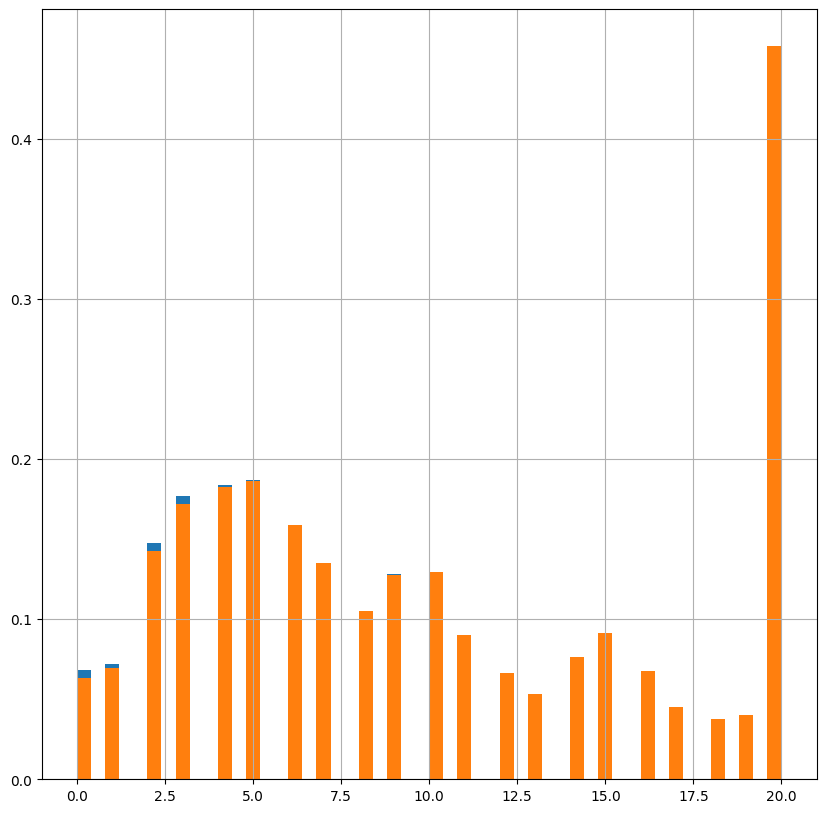

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

df['experience'].hist(bins=50,density=True,ax=ax)
new_df['experience'].hist(bins=50,density=True,ax=ax)

<Axes: ylabel='Density'>

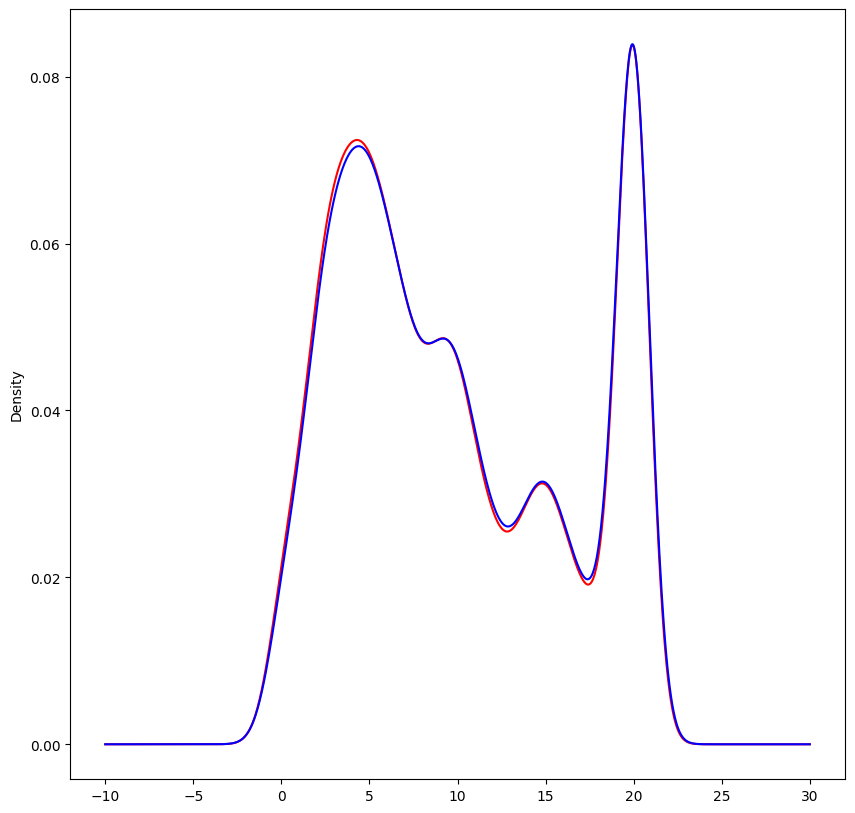

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

df['experience'].plot.density(color='red')
new_df['experience'].plot.density(color='blue')

#for categorical data

In [ ]:
df['enrolled_university'].value_counts()

,count
enrolled_university,
no_enrollment,13817
Full time course,3757
Part time course,1198


In [ ]:
temp=pd.concat(
    [df['enrolled_university'].value_counts()/len(df),
    new_df['enrolled_university'].value_counts()/len(new_df)],axis=1
)
temp.columns=['Original','New']
temp



,Original,New
enrolled_university,,
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [ ]:
temp2=pd.concat(
    [df['education_level'].value_counts()/len(df),
    new_df['education_level'].value_counts()/len(new_df)],axis=1
)
temp2.columns=['Original','New']
temp2

,Original,New
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# Handling missing data | Numerical Data | Simple Imputer

@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

#Mean & Median Imputaion
When use this-

i. Numerical Data

ii. data are random missing

iii. 5% data are missing

Drawback is
1. Change distribution shape
2. Make Outliers
3. Change Covariance and Correlation

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer

In [ ]:
train=pd.read_csv('/content/gdrive/MyDrive/Dataset/EDA/train.csv',usecols=['Age','Fare','SibSp','Survived'])

In [ ]:
train['Family']=train['SibSp']

In [ ]:
train.drop('SibSp',axis=1,inplace=True)

In [ ]:
train

,Survived,Age,Fare,Family
0,0,22.0,7.2500,1
1,1,38.0,71.2833,1
2,1,26.0,7.9250,0
3,1,35.0,53.1000,1
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [ ]:
train['Survived']=train['Survived']

In [ ]:
s=train.drop(['Survived'],axis=1)
s1=train['Survived']

In [ ]:
df=pd.concat([s,s1],axis=1)

In [ ]:
df

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0
...,...,...,...,...
886,27.0,13.0000,0,0
887,19.0,30.0000,0,1
888,NaN,23.4500,1,0
889,26.0,30.0000,0,1


In [ ]:
df.isnull().sum()

,0
Age,177
Fare,0
Family,0
Survived,0


In [ ]:
df1=df.copy()

In [ ]:
df1['Age'].fillna(df1['Age'].mean(),inplace=True)

<ipython-input-40-edee4f56bffa>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['Age'].fillna(df1['Age'].mean(),inplace=True)


In [ ]:
df1.isnull().sum()

,0
Age,0
Fare,0
Family,0
Survived,0


In [ ]:
df2=df.copy()

In [ ]:
df2['Age'].fillna(df2['Age'].median(),inplace=True)

<ipython-input-43-94762d5765c1>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['Age'].fillna(df2['Age'].median(),inplace=True)


In [ ]:
df['Age'].var() , df2['Age'].var() , df1['Age'].var()

(211.0191247463081, 169.51249827942328, 169.05239993721085)

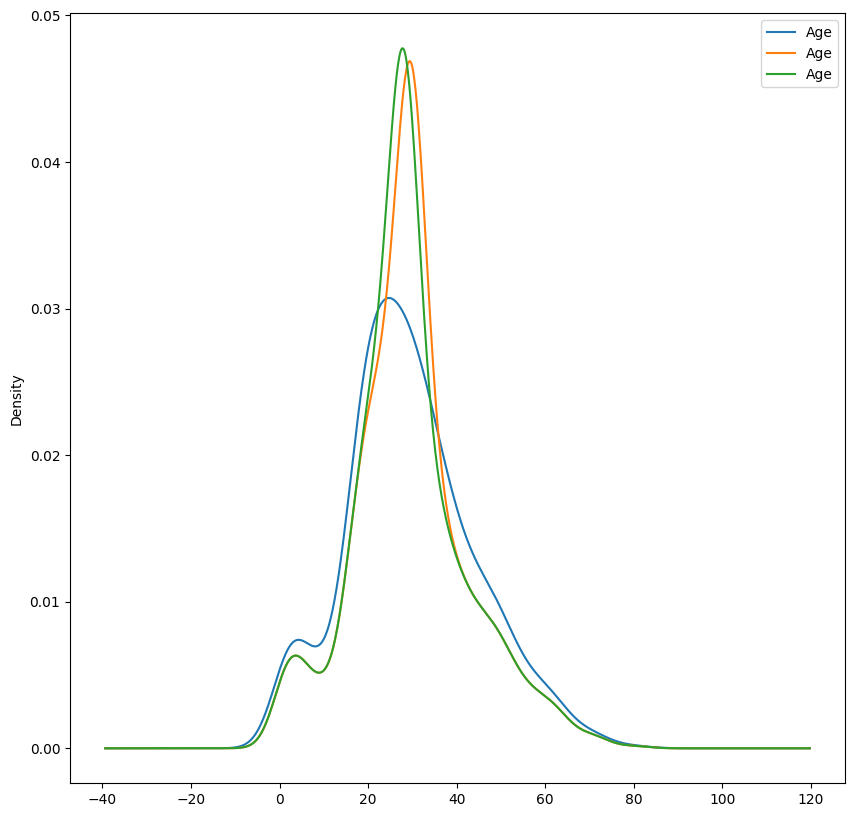

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

df['Age'].plot(kind='kde',ax=ax)
df1['Age'].plot(kind='kde',ax=ax)
df2['Age'].plot(kind='kde',ax=ax)

lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')

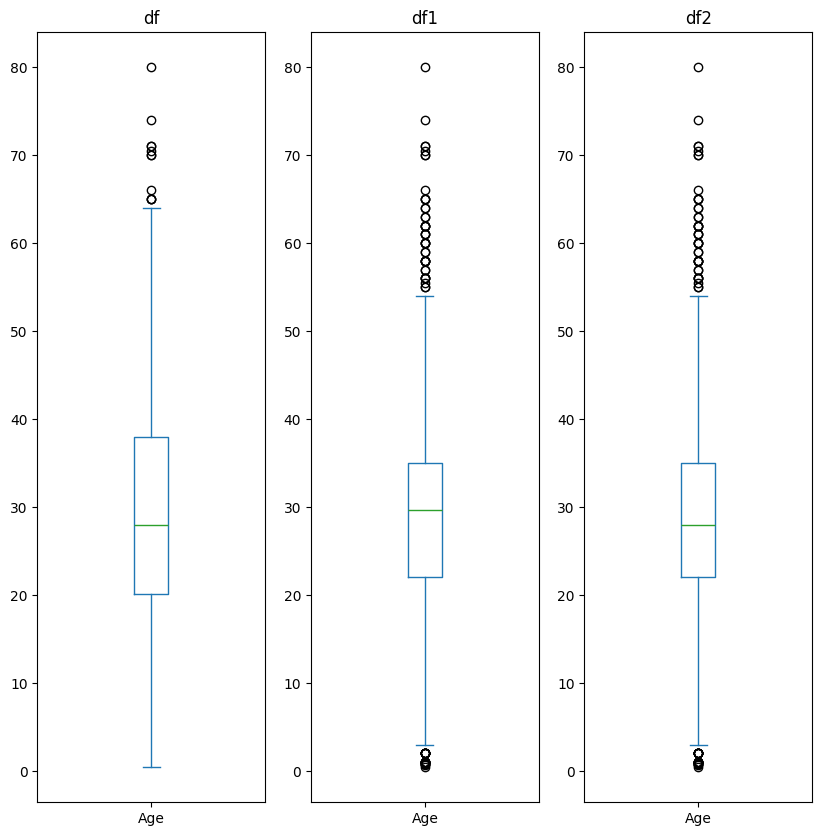

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
df['Age'].plot.box()
plt.title('df')

plt.subplot(1,3,2)
df1['Age'].plot.box()
plt.title('df1')

plt.subplot(1,3,3)
df2['Age'].plot.box()
plt.title('df2')
plt.show()


In [ ]:
imputer_m=SimpleImputer(strategy='mean')
imputer_mi=SimpleImputer(strategy='median')

In [ ]:
df['Age']=imputer_m.fit_transform(df[['Age']])
df1['Age']=imputer_mi.fit_transform(df1[['Age']])

In [ ]:
df.isnull().sum()

,0
Age,0
Fare,0
Family,0
Survived,0


# Constant imputer

When use this-

i. Categorical Data and also numerical

ii. data are not random missing

iii. if data are less that time it works well

Drawback is
1. Pdf graph distort
2. variance
3. Change Covariance and Correlation

In [ ]:
train=pd.read_csv('/content/gdrive/MyDrive/Dataset/EDA/train.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.isnull().mean()*100

,0
PassengerId,0.000000
Survived,0.000000
Pclass,0.000000
Name,0.000000
Sex,0.000000
Age,19.865320
SibSp,0.000000
Parch,0.000000
Ticket,0.000000
Fare,0.000000


In [ ]:
train['Age'].fillna(35,inplace=True)

<ipython-input-53-fbae03e08612>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(35,inplace=True)


In [ ]:
train['Age'].isnull().sum()

0

In [ ]:
train_imputer=pd.read_csv('/content/gdrive/MyDrive/Dataset/EDA/train.csv')

In [ ]:
train_imputer

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
imputer_train= SimpleImputer(strategy='constant',fill_value=35)
train_imputer['Age']=imputer_train.fit_transform(train_imputer[['Age']])

In [ ]:
train_imputer['Age'].isnull().sum()

0

# Most frequent value Imputation

When use this-

i. Categorical Data

ii. data are not random missing

iii. if data are less that time it works well

Drawback is
1. Change data distribution
2. variance
3. Change Covariance and Correlation

In [ ]:
df_train=pd.read_csv('/content/gdrive/MyDrive/Dataset/Handling missing data/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df_train

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [ ]:
df_train.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


Text(0, 0.5, 'Number of houses')

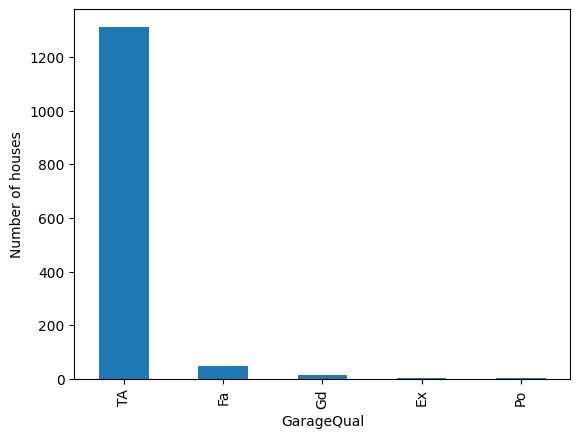

In [ ]:
df_train['GarageQual'].value_counts().sort_values(ascending=False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

#Random value imputer
When use this-

i. Categorical Data and numerical Data

ii. well for Linear and logistic regression

Drawback is
1. not Change data distribution
2. Memory heavy for deployment
3. Change Covariance and Correlation

In [ ]:
df_train=pd.read_csv('/content/gdrive/MyDrive/Dataset/EDA/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
df_train

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [ ]:
df1=df_train.copy()

In [ ]:
df1['Age'][df1['Age'].isnull()]=df1['Age'].dropna().sample(df1['Age'].isnull().sum()).values

<ipython-input-66-1e8d903f1cde>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df1['Age'][df1['Age'].isnull()]=df1['Age'].dropna().sample(df1['Age'].isnull().sum()).values
<ipython-input-66-1e8d903f1cde>:1: SettingWithCopyWarning: 
A value

In [ ]:
df1.isnull().sum()

,0
Survived,0
Age,0
Fare,0


<ipython-input-68-2e2a854bea91>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Age'],label='Original',hist=False)
<ipython-input-68-2e2a854bea91>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['Age'],label='Imputed',hist=False)


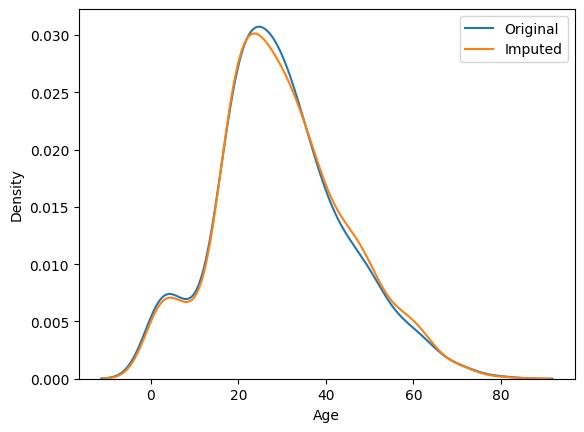

In [ ]:
sns.distplot(df_train['Age'],label='Original',hist=False)
sns.distplot(df1['Age'],label='Imputed',hist=False)
plt.legend()
plt.show()

In [ ]:
df_train['Age'].var(),df1['Age'].var()

(211.0191247463081, 213.43910130695244)

In [ ]:
df_train.corr()

,Survived,Age,Fare
Survived,1.000000,-0.077221,0.257307
Age,-0.077221,1.000000,0.096067
Fare,0.257307,0.096067,1.000000


In [ ]:
df1.corr()

,Survived,Age,Fare
Survived,1.000000,-0.105606,0.257307
Age,-0.105606,1.000000,0.083757
Fare,0.257307,0.083757,1.000000


<Axes: >

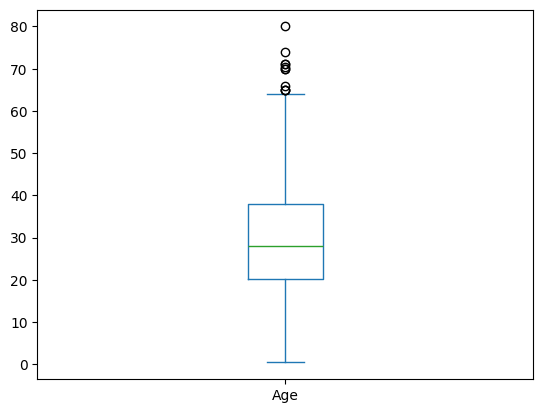

In [ ]:
df_train['Age'].plot.box()

<Axes: >

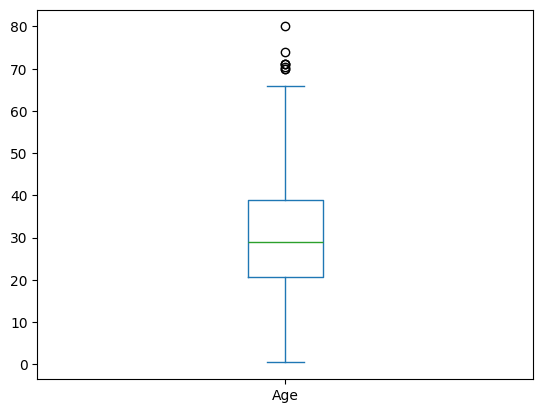

In [ ]:
df1['Age'].plot.box()

#For categorical data

In [ ]:
df_House=pd.read_csv('/content/gdrive/MyDrive/Dataset/Handling missing data/train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [ ]:
df_House

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [ ]:
df_House.isnull().mean()*100

,0
FireplaceQu,47.260274
GarageQual,5.547945
SalePrice,0.000000


In [ ]:
df_House['GarageQual'][df_House['GarageQual'].isnull()]=df_House['GarageQual'].dropna().sample(df_House['GarageQual'].isnull().sum()).values
df_House['FireplaceQu'][df_House['FireplaceQu'].isnull()]=df_House['FireplaceQu'].dropna().sample(df_House['FireplaceQu'].isnull().sum()).values

<ipython-input-77-a340ec10dbe1>:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_House['GarageQual'][df_House['GarageQual'].isnull()]=df_House['GarageQual'].dropna().sample(df_House['GarageQual'].isnull().sum()).values
<ipython-input-77-a

In [ ]:
df_House.isnull().sum()

,0
FireplaceQu,0
GarageQual,0
SalePrice,0


# Missing Indicator

1. Make a new column
2. You Can check some time its work

In [ ]:
d=pd.read_csv('/content/gdrive/MyDrive/Dataset/EDA/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
d

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500
...,...,...,...
886,0,27.0,13.0000
887,1,19.0,30.0000
888,0,NaN,23.4500
889,1,26.0,30.0000


In [ ]:
d.isnull().sum()

,0
Survived,0
Age,177
Fare,0


In [ ]:
from sklearn.impute import MissingIndicator

In [ ]:
mi = MissingIndicator()
d['mising_age']=mi.fit_transform(d[['Age']])
d

,Survived,Age,Fare,mising_age
0,0,22.0,7.2500,False
1,1,38.0,71.2833,False
2,1,26.0,7.9250,False
3,1,35.0,53.1000,False
4,0,35.0,8.0500,False
...,...,...,...,...
886,0,27.0,13.0000,False
887,1,19.0,30.0000,False
888,0,NaN,23.4500,True
889,1,26.0,30.0000,False


In [ ]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='mean')
d['Age']=si.fit_transform(d[['Age']])
#now this is ready for model
x_train,x_test,y_train,y_test=train_test_split(d.drop('Survived',axis=1),d['Survived'],test_size=0.2,random_state=42)

LR=LogisticRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)
accuracy_score(y_test,y_pred)

0.6368715083798883

In [ ]:
#mantos way
df_=pd.read_csv('/content/gdrive/MyDrive/Dataset/EDA/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
SI = SimpleImputer(add_indicator=True)
df_['Age']=SI.fit_transform(df_[['Age']])

In [ ]:
df_

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_.drop('Survived',axis=1),df_['Survived'],test_size=0.2,random_state=42)

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Lr=LogisticRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
accuracy_score(y_test,y_pred)


0.6480446927374302

In [ ]:
df_m=pd.read_csv('/content/gdrive/MyDrive/Dataset/EDA/train.csv',usecols=['Age','Fare','Survived'])

In [ ]:
sip=SimpleImputer()
df_m['Age']=sip.fit_transform(df_m[['Age']])

x_train,x_test,y_train,y_test=train_test_split(df_m.drop('Survived',axis=1),df_m['Survived'],test_size=0.2,random_state=42)

Lr=LogisticRegression()
Lr.fit(x_train,y_train)
y_pred=Lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.6480446927374302

# Automatically select value for imputation


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Dataset/EDA/train.csv')

In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)

In [ ]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [ ]:
# Correct the typo in 'numetical_features'
numerical_features = ['Age', 'Fare']
# Ensure categorical_features are present
categorical_features = ['Sex', 'Embarked']

# Rest of your code...

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(transformers=[
    ('num', numerical_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

# ... (rest of the code)

param_grid = {
    'preprocessor__num__imputer__strategy': ['mean', 'median'],
    'preprocessor__cat__imputer__strategy': ['most_frequent', 'constant'],
    'classifier__C': [0.1, 1, 10, 100]
}

grid_search = GridSearchCV(clf, param_grid, cv=10, scoring='accuracy')

# Ensure x_train contains the expected features after train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('Survived', axis=1), df['Survived'], test_size=0.2, random_state=42
)

# Verify that the columns exist in x_train before fitting
print(x_train.columns)

grid_search.fit(x_train, y_train)
print(f'Best params:')
print(grid_search.best_params_)
print(f'Best score:{grid_search.best_score_:.3f}')

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked'], dtype='object')
Best params:
{'classifier__C': 0.1, 'preprocessor__cat__imputer__strategy': 'most_frequent', 'preprocessor__num__imputer__strategy': 'mean'}
Best score:0.784


In [ ]:
import pandas as pd

cv_reslts = pd.DataFrame(grid_search.cv_results_)
cv_reslts = cv_reslts.sort_values(by='rank_test_score')
cv_reslts[['param_classifier__C', 'param_preprocessor__cat__imputer__strategy', 'param_preprocessor__num__imputer__strategy', 'mean_test_score', 'rank_test_score']]

,param_classifier__C,param_preprocessor__cat__imputer__strategy,param_preprocessor__num__imputer__strategy,mean_test_score,rank_test_score
0,0.1,most_frequent,mean,0.783725,1
1,0.1,most_frequent,median,0.783725,1
2,0.1,constant,mean,0.783725,1
3,0.1,constant,median,0.783725,1
4,1.0,most_frequent,mean,0.782316,5
5,1.0,most_frequent,median,0.782316,5
6,1.0,constant,mean,0.782316,5
7,1.0,constant,median,0.782316,5
8,10.0,most_frequent,mean,0.782316,5
9,10.0,most_frequent,median,0.782316,5


(((((((((((((((((((((((((((((())))))))))))))))))))))))))))))

#KNN imputer

! Whene use= (small or mediam) dataset why 'see disadvantage'

1. Advantage

   i) More accurate

2. Disadvantage

   i) if you deploy this things that time you need to (Upload your train set on the server) because its calculate all points distance.

   ii) More calculation thats why take more time

)(((((((((((((((((((((((()()())()())())()))())()()()))()()()()()())()())()()()()()()(

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.impute import KNNImputer, SimpleImputer


In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Dataset/EDA/train.csv',usecols=['Age','Pclass','Fare','Survived'])

In [ ]:
df

,Survived,Pclass,Age,Fare
0,0,3,22.0,7.2500
1,1,1,38.0,71.2833
2,1,3,26.0,7.9250
3,1,1,35.0,53.1000
4,0,3,35.0,8.0500
...,...,...,...,...
886,0,2,27.0,13.0000
887,1,1,19.0,30.0000
888,0,3,NaN,23.4500
889,1,1,26.0,30.0000


In [ ]:
df.isnull().mean()*100

,0
Survived,0.00000
Pclass,0.00000
Age,19.86532
Fare,0.00000


In [ ]:
knn=KNNImputer(n_neighbors=3,weights='distance',add_indicator=True)
df['Age']=knn.fit_transform(df[['Age']])

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.drop('Survived',axis=1),df['Survived'],test_size=0.21,random_state=42)

In [ ]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
accuracy_score(y_test,y_pred)

0.7446808510638298

In [ ]:
train_accuracyLrg=lr.score(x_train,y_train)
test_accuracyLrg=lr.score(x_test,y_test)

In [ ]:
train_accuracyLrg,test_accuracyLrg

(0.6955903271692745, 0.7446808510638298)

In [ ]:
train_accuracy,test_accuracy

(0.6934578544061303, 0.7294117647058823)

$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
#Multivariate Imputation by Chained Equations(MICE)
@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

! Whene use= (small or mediam) dataset why 'see disadvantage'

Advantage

i) More accurate

Disadvantage

i) if you deploy this things that time you need to (Upload your train set on the server) because its calculate all points distance.

ii) More calculation thats why take more time